In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np

In [2]:
file_path = '../radnlp_2024_train_val_20240731/en/main_task/train/label.csv'
data = pd.read_csv(file_path)

count = len(data)
print(f'Total number of rows(train): {count}')

file_path = '../radnlp_2024_train_val_20240731/en/main_task/val/label.csv'
data = pd.read_csv(file_path)

count = len(data)
print(f'Total number of rows(val): {count}')

Total number of rows(train): 108
Total number of rows(val): 54


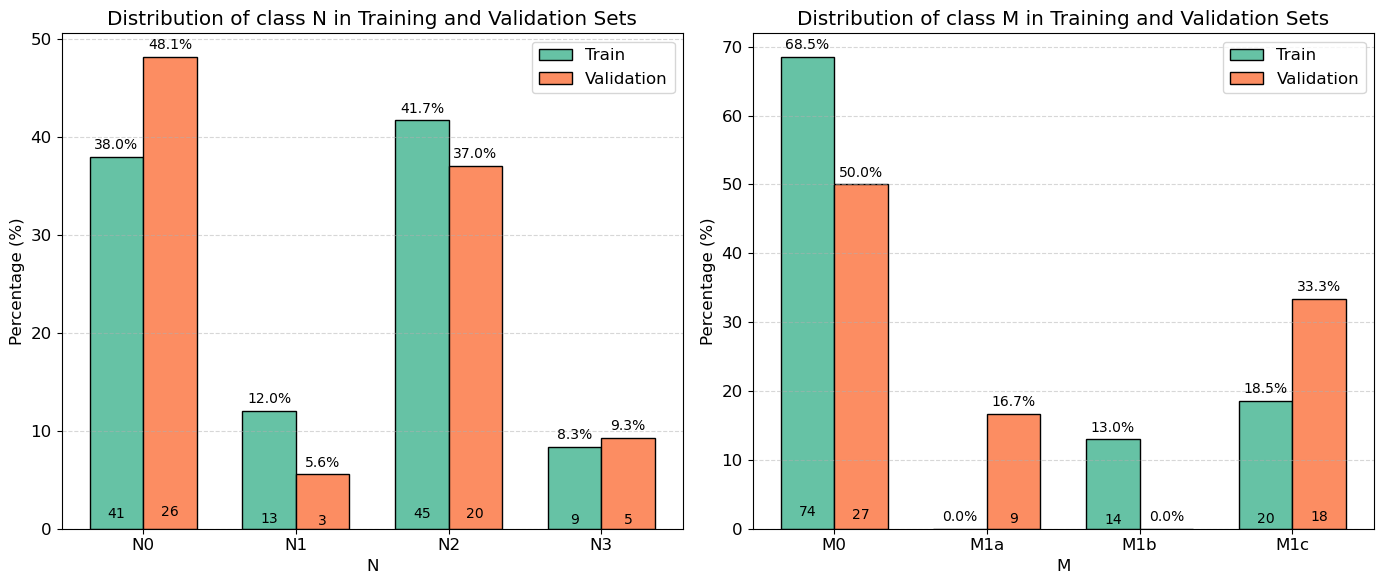

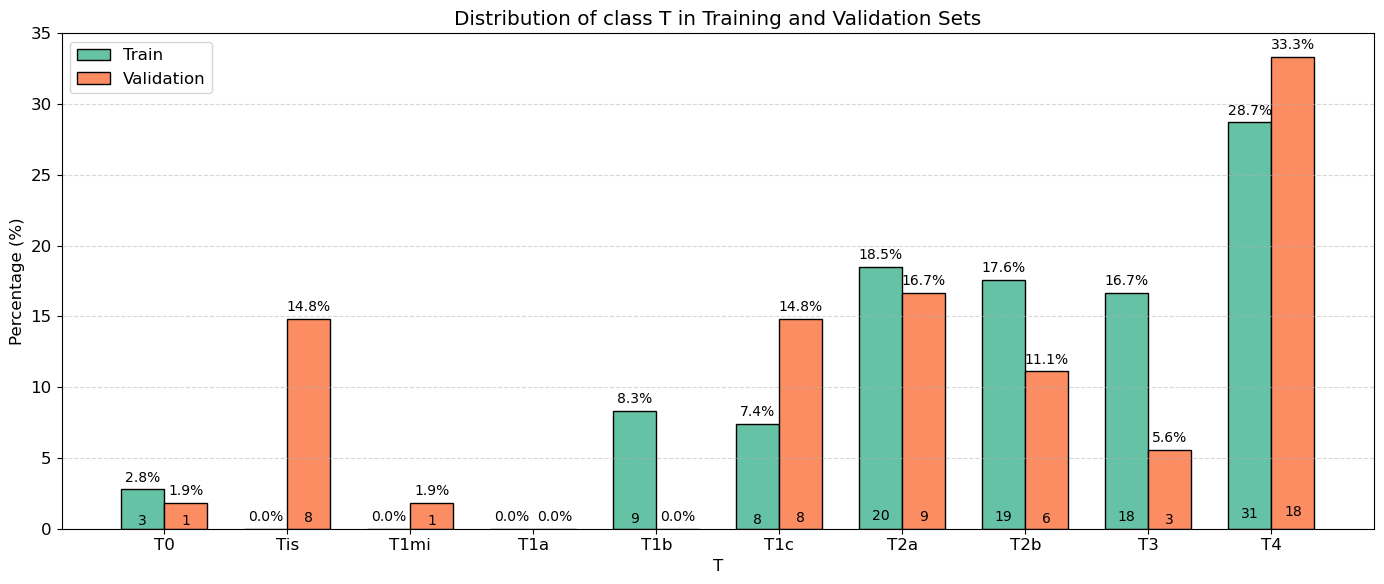

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams

# Load the CSV files
train_file_path = '../radnlp_2024_train_val_20240731/en/main_task/train/label.csv'
val_file_path = '../radnlp_2024_train_val_20240731/en/main_task/val/label.csv'

train_data = pd.read_csv(train_file_path)
val_data = pd.read_csv(val_file_path)

# Define the classes for T, N, and M
T_classes = ['T0', 'Tis', 'T1mi', 'T1a', 'T1b', 'T1c', 'T2a', 'T2b', 'T3', 'T4']
N_classes = ['N0', 'N1', 'N2', 'N3']
M_classes = ['M0', 'M1a', 'M1b', 'M1c']

# Increase default font sizes for better readability in the paper
rcParams.update({'font.size': 12})

# Function to plot grouped bar chart for a given column and classes
def plot_comparison_bar(column, title, classes, ax):
    # Get value counts for train and val datasets and reindex to include all classes, filling missing with 0
    train_counts = train_data[column].value_counts().reindex(classes, fill_value=0)
    val_counts = val_data[column].value_counts().reindex(classes, fill_value=0)
    
    # Total number of samples in train and val datasets
    train_total = len(train_data)
    val_total = len(val_data)
    
    # Calculate percentages
    train_percentages = (train_counts / train_total) * 100
    val_percentages = (val_counts / val_total) * 100
    
    # Define positions for bars
    x = np.arange(len(classes))  # label locations
    width = 0.35  # width of the bars
    
    # Define a color palette suitable for publications (light colors, color-blind friendly)
    colors = sns.color_palette('Set2', n_colors=2)
    
    # Create the bars
    bars1 = ax.bar(x - width/2, train_percentages.values, width, label='Training', color=colors[0], edgecolor='black')
    bars2 = ax.bar(x + width/2, val_percentages.values, width, label='Validation', color=colors[1], edgecolor='black')
    
    # Title and labels
    ax.set_title(f'Distribution of class {title} in Training and Validation Sets')
    ax.set_xlabel(title)
    ax.set_ylabel('Percentage (%)')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()
    
    # Add grid lines in the background
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)  # Grid lines for the y-axis, dashed, and with 50% transparency
    
    # Numbers inside the bars (sample count at the bottom center of each bar)
    for bars, counts, total in zip([bars1, bars2], [train_counts, val_counts], [train_total, val_total]):
        for bar, count in zip(bars, counts):
            yval = bar.get_height()
            if count != 0:  # Only show the sample count inside the bar if count > 0
                # Show the sample count at the bottom of the bar
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # Position at the bottom center of the bar
                    yval * 0.02,  # Move slightly inside the bar
                    f'{int(count)}',  # Number of samples
                    ha='center',
                    va='bottom',  # Place the text at the bottom of the bar
                    fontsize=10,
                )
    
    # Numbers above the bars (percentage), always show the percentage
    for bars, percentages in zip([bars1, bars2], [train_percentages, val_percentages]):
        for bar, percentage in zip(bars, percentages):
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                yval + max(train_percentages.max(), val_percentages.max()) * 0.01,
                f'{yval:.1f}%',  # Percentage
                ha='center',
                va='bottom',
                fontsize=10,
            )

# Create a figure with two subplots (1 row, 2 columns) for N and M
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar charts for 'N' and 'M' classes
plot_comparison_bar('n', 'N', N_classes, ax1)
plot_comparison_bar('m', 'M', M_classes, ax2)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the figure for N and M
plt.show()

# Now, plot the T class in a separate figure with the same size as the previous one
fig, ax3 = plt.subplots(figsize=(14, 6))  # Same size (14, 6)

# Plot the bar chart for 'T' classes
plot_comparison_bar('t', 'T', T_classes, ax3)

# Show the figure for T
plt.tight_layout()
plt.show()


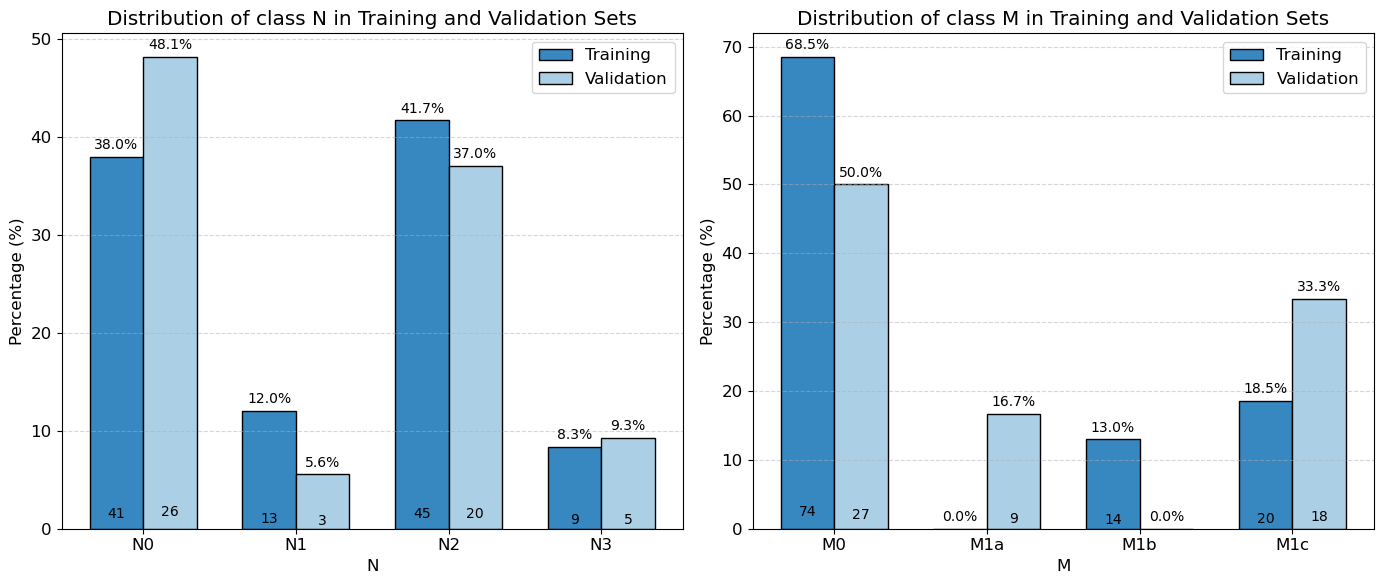

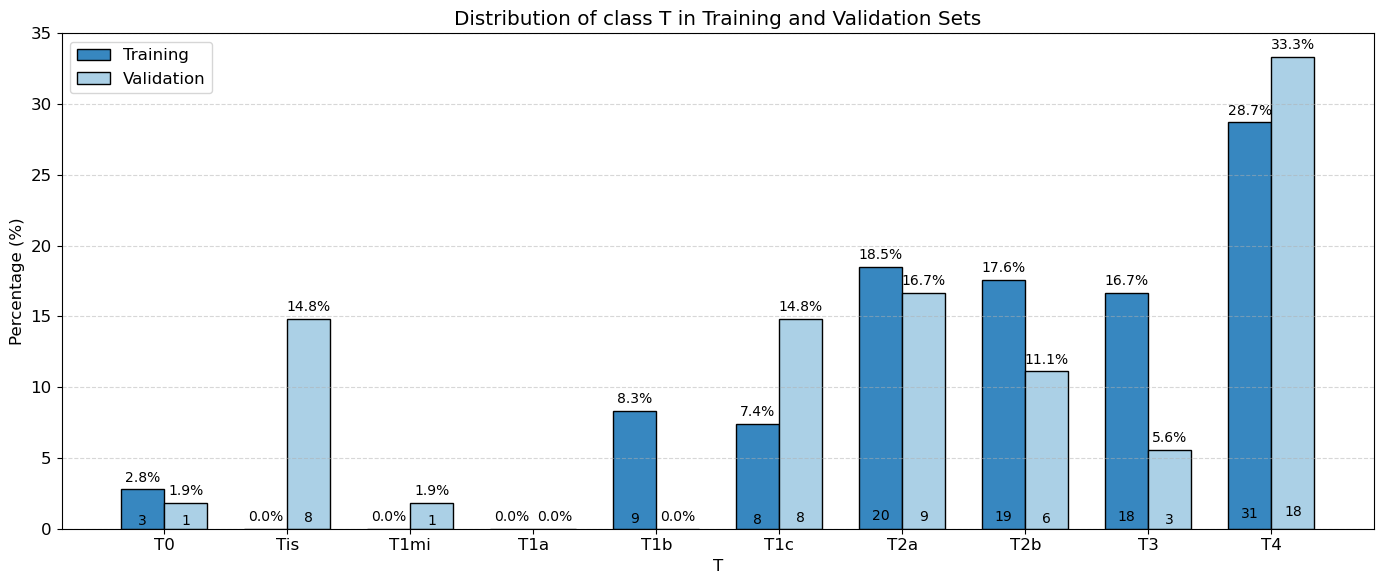

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams

# Load the CSV files
train_file_path = '../radnlp_2024_train_val_20240731/en/main_task/train/label.csv'
val_file_path = '../radnlp_2024_train_val_20240731/en/main_task/val/label.csv'

train_data = pd.read_csv(train_file_path)
val_data = pd.read_csv(val_file_path)

# Define the classes for T, N, and M
T_classes = ['T0', 'Tis', 'T1mi', 'T1a', 'T1b', 'T1c', 'T2a', 'T2b', 'T3', 'T4']
N_classes = ['N0', 'N1', 'N2', 'N3']
M_classes = ['M0', 'M1a', 'M1b', 'M1c']

# Increase default font sizes for better readability in the paper
rcParams.update({'font.size': 12})

# Function to plot grouped bar chart for a given column and classes
def plot_comparison_bar(column, title, classes, ax):
    # Get value counts for train and val datasets and reindex to include all classes, filling missing with 0
    train_counts = train_data[column].value_counts().reindex(classes, fill_value=0)
    val_counts = val_data[column].value_counts().reindex(classes, fill_value=0)
    
    # Total number of samples in train and val datasets
    train_total = len(train_data)
    val_total = len(val_data)
    
    # Calculate percentages
    train_percentages = (train_counts / train_total) * 100
    val_percentages = (val_counts / val_total) * 100
    
    # Define positions for bars
    x = np.arange(len(classes))  # label locations
    width = 0.35  # width of the bars
    
    # Define a color palette using the same blue hue but with two different intensities:
    # darker for Training and lighter for Validation.
    palette = sns.color_palette("Blues", 2)
    # The second color is darker and the first is lighter
    train_color = palette[1]
    val_color = palette[0]
    
    # Create the bars with the new colors
    bars1 = ax.bar(x - width/2, train_percentages.values, width, label='Training', color=train_color, edgecolor='black')
    bars2 = ax.bar(x + width/2, val_percentages.values, width, label='Validation', color=val_color, edgecolor='black')
    
    # Title and labels
    ax.set_title(f'Distribution of class {title} in Training and Validation Sets')
    ax.set_xlabel(title)
    ax.set_ylabel('Percentage (%)')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()
    
    # Add grid lines in the background
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)  # Grid lines for the y-axis, dashed, with 50% transparency
    
    # Numbers inside the bars (sample count at the bottom center of each bar)
    for bars, counts, total in zip([bars1, bars2], [train_counts, val_counts], [train_total, val_total]):
        for bar, count in zip(bars, counts):
            yval = bar.get_height()
            if count != 0:  # Only show the sample count inside the bar if count > 0
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # Position at the bottom center of the bar
                    yval * 0.02,  # Slightly inside the bar
                    f'{int(count)}',  # Number of samples
                    ha='center',
                    va='bottom',
                    fontsize=10,
                )
    
    # Numbers above the bars (percentage), always show the percentage
    for bars, percentages in zip([bars1, bars2], [train_percentages, val_percentages]):
        for bar, percentage in zip(bars, percentages):
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                yval + max(train_percentages.max(), val_percentages.max()) * 0.01,
                f'{yval:.1f}%',  # Percentage
                ha='center',
                va='bottom',
                fontsize=10,
            )

# Create a figure with two subplots (1 row, 2 columns) for N and M
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar charts for 'N' and 'M' classes
plot_comparison_bar('n', 'N', N_classes, ax1)
plot_comparison_bar('m', 'M', M_classes, ax2)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the figure for N and M
plt.show()

# Now, plot the T class in a separate figure with the same size as the previous one
fig, ax3 = plt.subplots(figsize=(14, 6))  # Same size (14, 6)

# Plot the bar chart for 'T' classes
plot_comparison_bar('t', 'T', T_classes, ax3)

# Adjust layout and show the figure for T
plt.tight_layout()
plt.show()
